# STORE SALES AND PROFIT ANALYSIS

##### This notebook performs an in-depth analysis of store sales and profitability using the **Sample Superstore** dataset.

#### Import libraries

In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#### Loading Dataset

In [3]:
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## # Data Preparation :

#### Datetime format

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11-01
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11-01
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06-01
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10-01
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10-01


#### Handling Missing values

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### Outlier Detection

In [5]:
df['Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()
df.describe()[['Sales', 'Profit']]

,Sales,Profit
count,9994.000000,9994.000000
mean,229.858001,28.656896
min,0.444000,-6599.978000
25%,17.280000,1.728750
50%,54.490000,8.666500
75%,209.940000,29.364000
max,22638.480000,8399.976000
std,623.245101,234.260108


## # Sales Analysis :

#### Temporal sales trends 

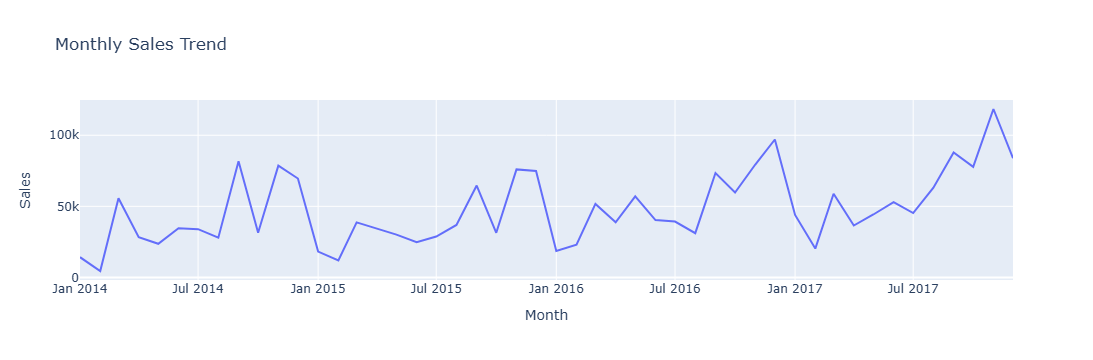

In [6]:
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
fig = px.line(monthly_sales, x='Month', y='Sales', title='Monthly Sales Trend')
fig.show()

#### Category wise analysis 

In [18]:
cat_sales = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().reset_index()
fig = px.bar(cat_sales, x='Sub-Category', y='Sales', color='Category', title='Category-wise Sales')
fig.show()

## # Profit Analysis :

#### Profit trends

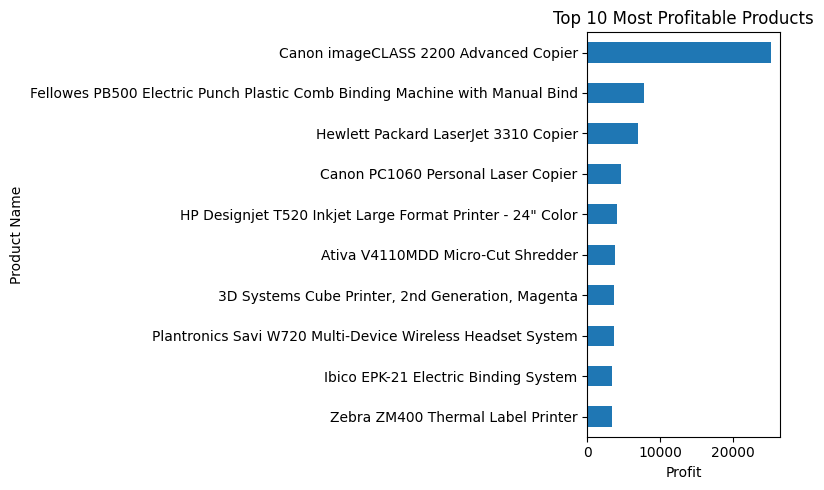

In [11]:
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Most Profitable Products', figsize=(8,5))
plt.xlabel('Profit')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## # Visualization :

In [12]:
segment_profit = df.groupby('Segment')['Profit'].sum().reset_index()
fig = px.bar(segment_profit, x='Segment', y='Profit', title='Segment-wise Profitability')
fig.show()

## # Operational insights :

#### Sales-to-profit ratios 

In [16]:
cat_ratio = df.groupby('Category')[['Sales', 'Profit']].sum()
cat_ratio['Profit Ratio'] = cat_ratio['Profit'] / cat_ratio['Sales']
cat_ratio.sort_values('Profit Ratio', ascending=False)

,Sales,Profit,Profit Ratio
Category,,,
Technology,836154.0330,145454.9481,0.173957
Office Supplies,719047.0320,122490.8008,0.170352
Furniture,741999.7953,18451.2728,0.024867


#### Customer segment performance

In [9]:
segment_eff = df.groupby('Segment')[['Sales', 'Profit']].sum()
segment_eff['Efficiency'] = segment_eff['Profit'] / segment_eff['Sales']
segment_eff

,Sales,Profit,Efficiency
Segment,,,
Consumer,1.161401e+06,134119.2092,0.115481
Corporate,7.061464e+05,91979.1340,0.130255
Home Office,4.296531e+05,60298.6785,0.140343


## # Conclusion :

- Data Cleaning and Preparation
- Sales Trends Analysis
- Profitability Analysis
- Category/Sub-category Performance
- Customer Segment Evaluation
- Visualizations using Plotly
- Operational Insights